# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

521

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=bathsheba
Processing Record 2 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=port%20elizabeth
Processing Record 3 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=auki
Processing Record 4 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=barrow
Processing Record 5 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=clyde%20river
Processing Record 6 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=new%20norfolk
Processing Record 7 | Ushuaia
http://api.openweathermap.org/data/

Processing Record 57 | Puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=puri
Processing Record 58 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=mataura
City not found. Skipping...
Processing Record 59 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=jamestown
City not found. Skipping...
Processing Record 60 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=quatre%20cocos
Processing Record 61 | Farafangana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=farafangana
City not found. Skipping...
Processing Record 62 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=qaanaaq
Processing Record 63 | Wawa
http://api.openwea

Processing Record 112 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=belmonte
Processing Record 113 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=kaitangata
City not found. Skipping...
Processing Record 114 | Morro Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=morro%20bay
Processing Record 115 | Mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=mikhaylovka
Processing Record 116 | Aleksandrovsk-Sakhalinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=aleksandrovsk-sakhalinskiy
City not found. Skipping...
Processing Record 117 | Quijingue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=quijingue
Processing Record 118 

Processing Record 167 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=faanui
Processing Record 168 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=port%20hardy
Processing Record 169 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=rocha
Processing Record 170 | Kenora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=kenora
Processing Record 171 | Gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=gazli
Processing Record 172 | Porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=porbandar
Processing Record 173 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=chok

City not found. Skipping...
Processing Record 223 | Remiremont
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=remiremont
Processing Record 224 | Dutlwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=dutlwe
Processing Record 225 | Save
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=save
Processing Record 226 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=takoradi
Processing Record 227 | Gwadar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=gwadar
Processing Record 228 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=lavrentiya
Processing Record 229 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 278 | North Myrtle Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=north%20myrtle%20beach
Processing Record 279 | Green River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=green%20river
Processing Record 280 | Xinxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=xinxiang
Processing Record 281 | Phangnga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=phangnga
Processing Record 282 | Namie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=namie
Processing Record 283 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=dingle
Processing Record 284 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d81

Processing Record 334 | Matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=matara
Processing Record 335 | Porto Walter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=porto%20walter
Processing Record 336 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=pangnirtung
Processing Record 337 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=egvekinot
Processing Record 338 | Mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=mana
Processing Record 339 | Semey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=semey
City not found. Skipping...
Processing Record 340 | La Palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5

Processing Record 390 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=mogadishu
Processing Record 391 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=flin%20flon
City not found. Skipping...
Processing Record 392 | Hun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=hun
Processing Record 393 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=lorengau
City not found. Skipping...
Processing Record 394 | Dondaicha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=dondaicha
Processing Record 395 | Abu Kamal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=abu%20kamal
City not found. Skipping...
Processing Record 396 | Richards Bay
http://

Processing Record 445 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=waddan
Processing Record 446 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=henties%20bay
Processing Record 447 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=skibbereen
Processing Record 448 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=port%20blair
Processing Record 449 | Ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=ahuimanu
Processing Record 450 | Alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8948cb70197777e1f2e7e2e&q=alekseyevsk
Processing Record 451 | Ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d814b77e8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          471
Cloudiness    471
Country       471
Date          471
Humidity      471
Lat           471
Lng           471
Max Temp      471
Wind Speed    471
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bathsheba,75,BB,1562850255,62,13.22,-59.52,86.00,18.34
1,Port Elizabeth,40,US,1562850256,83,39.31,-74.98,82.00,6.93
2,Auki,97,NG,1562850257,55,12.18,6.51,86.15,12.17
3,Barrow,100,AR,1562850082,87,-38.31,-60.23,46.37,3.98
4,Clyde River,90,CA,1562850188,81,70.47,-68.59,44.60,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

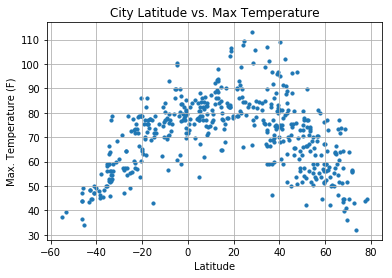

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

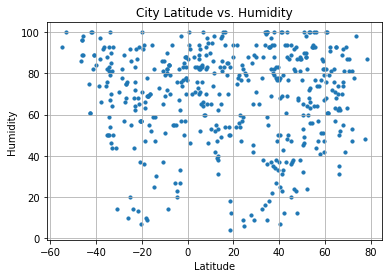

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

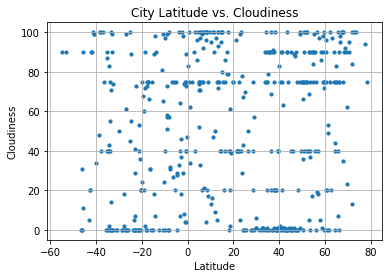

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

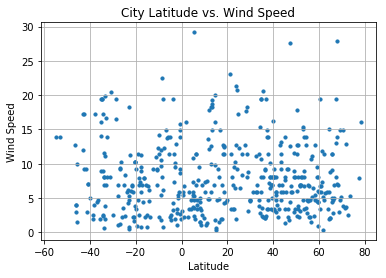

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind Speed_vs_Latitude.png")

# Show plot
plt.show()